# Bodyfat Percentage Predictor

## What is bodyfat and why is it useful to have knowledge about it ?

Bodyfat is the `total amount of fat` in your body. Everybody has at least a little bit of bodyfat.\
It is the extra, stored energy in your body. It's like a savings account for calories. Just as you put money in a savings account to use when you need it, your body stores calories as fat to use for energy later. Having some body fat is normal and healthy, but too much can cause health issues (contrarely to money in your bank account).

Thus, predicting bodyfat percentage can be useful for many reasons, including :
| Bodyfat knowledge benefits  |                                                                                                                                |
|----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| health               | Knowing the body fat percentage can help us to identify any potential health risks associated with excess body fat.                  |
| athletic performance | Knowing the body fat percentage can help us to stay motivated to lose weight and improve the health as we see the number dicreasing. |
| self-image           | Body fat can affect the athletic performance in a number of ways.                                                                    |
| motivation           | Knowing the body fat percentage can help us to feel more confident and comfortable in the own skin.                                  |

## Purpose of the Notebook

Predicting bodyfat percentage is a `regression problem` as we want to predict a number (the bodyfat percentage of a person) among an infinity of numbers.

This notebook aims to use regression techniques to predict the bodyfat percentage given certain parameters that should be pretty easy to measure for any body.

- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)


### 1. Exploratory Data Analysis (EDA)
#### 1.1 Data discovery

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/bodyfat.csv')
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


As we can see, our data consists of 252 examples described by 15 features each, with gives us 3,780 values. As said earlier in this notebook, we will drop the density feature, as it is something harder to measure for a normal person.

In [3]:
data = data.drop(columns='Density')
data

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


After dropping the column responsible for Body Densitiy, we still have 252 examples, but they are described by 14 features each, which gives us 3,528 values.

Let's check if the dataset is full, or if there are empty entries among the columns.

In [4]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

Good, there is no empty value in the dataset. We can now move on to analysis of each feature.

#### 1.2 Age

As we want our tool to work for most people, it is important that we try to avoid outliers. Let's draw a boxplot of the Age to see if there is any outliers

<Axes: xlabel='Age', ylabel='Density'>

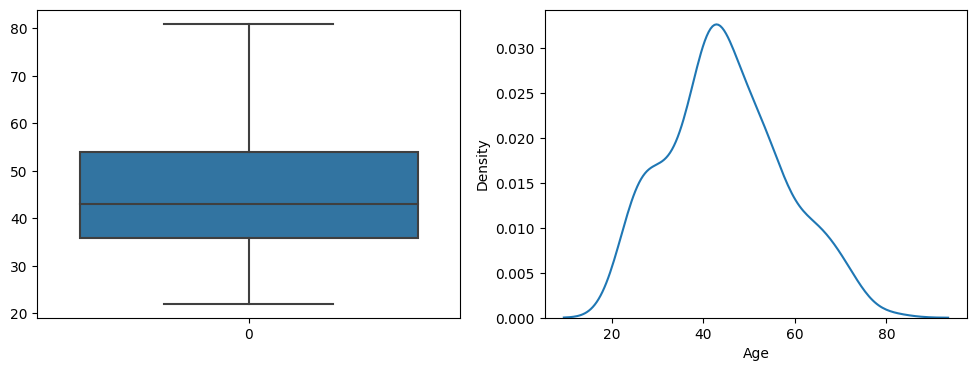

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Age'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Age"])

As we can see, it seems like there is no outliers in the Age columnm, and the distribution is close to a normal distribution.

Now let's analyse the relationship between age and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Age', ylabel='BodyFat'>

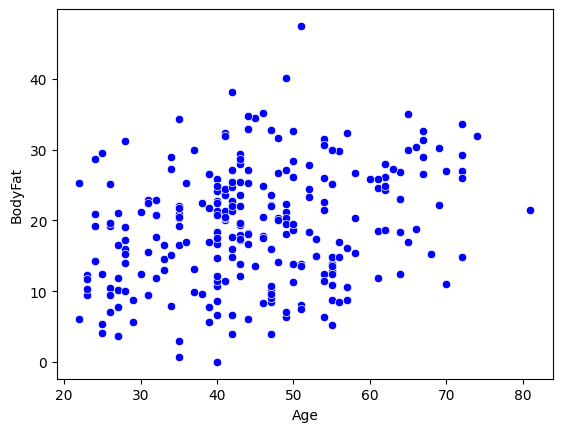

In [6]:
sns.scatterplot(x=data['Age'], y=data['BodyFat'], color='blue', marker='o')

We could think that as people age, their body percentage increase, but this plot shows us that there seem to be no real relationship between age and bodyfat.

#### 1.3 Weight

Let's draw a boxplot of the Weight to see if there is any outliers

<Axes: xlabel='Weight', ylabel='Density'>

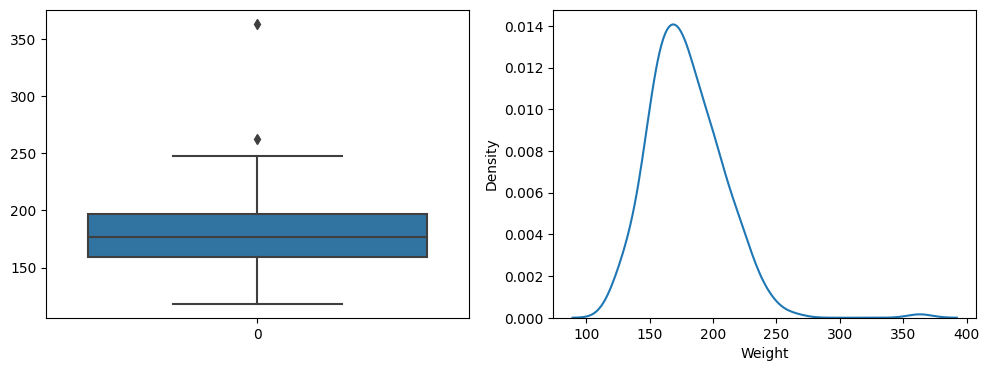

In [7]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Weight'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Weight"])

As we can see, there are outliers. What we can do is replace values over 250 by the mean of weights, so we reduce the number of outliers, and our distribution becomes normal.

In [8]:
data["Weight"] = np.where(data["Weight"] > 250 , data["Weight"].mean() , data["Weight"])

<Axes: xlabel='Weight', ylabel='Density'>

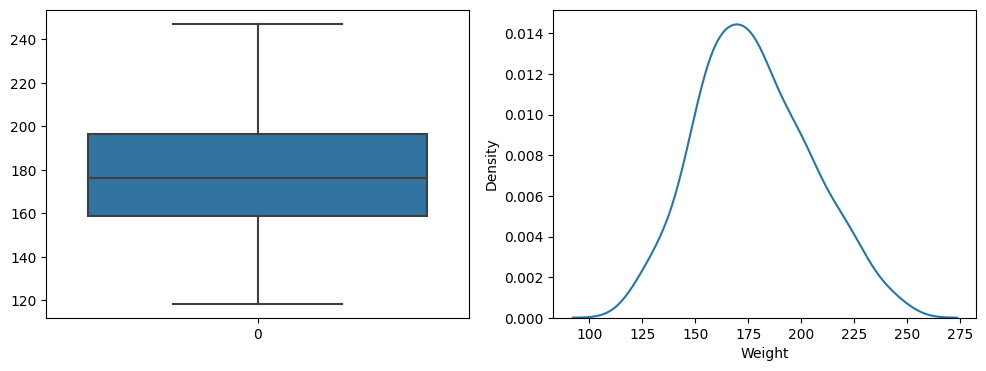

In [9]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Weight'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Weight"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between weight and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Weight', ylabel='BodyFat'>

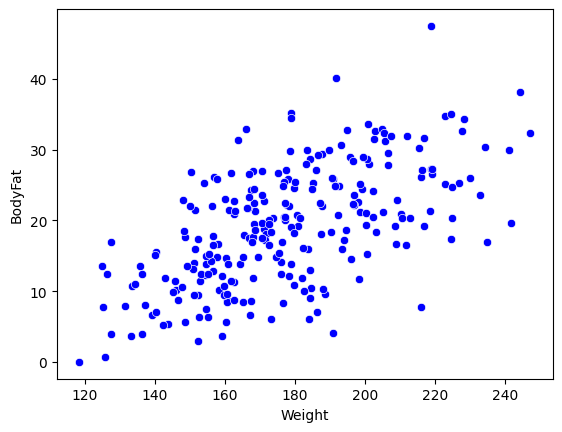

In [10]:
sns.scatterplot(x=data["Weight"], y=data["BodyFat"], color='blue', markers='o')

There is a slight relationship that we can extract. In fact, we can see that as the weight increases, the bodyfat seems to increase aswell. I thought it would be clearer, but I suppose when people are heavier, they tend to be bigger aswell so the bodyfat is not always so high when the weight is high.

Let's verify this by analysing the height data !

#### 1.4 Height

Let's draw a boxplot of the Height to see if there is any outliers

<Axes: xlabel='Height', ylabel='Density'>

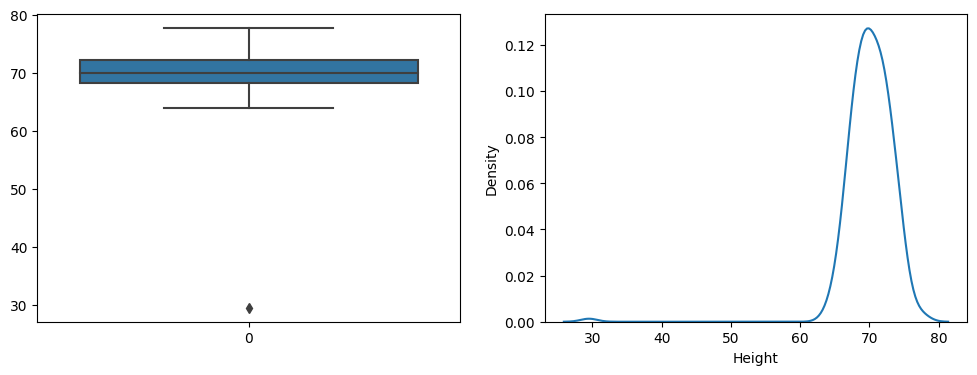

In [11]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Height'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Height"])

As we can see, there are outliers. What we can do is replace values under 30 by the mean of heights, so we reduce the number of outliers, and our distribution becomes normal.

In [12]:
data['Height'] = np.where(data['Height'] < 30, data["Height"].mean() , data["Height"])

<Axes: xlabel='Height', ylabel='Density'>

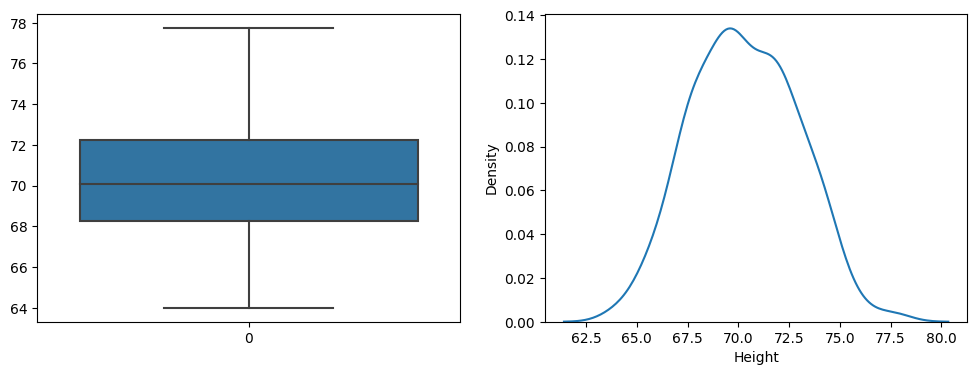

In [13]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Height'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Height"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between height and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Height', ylabel='BodyFat'>

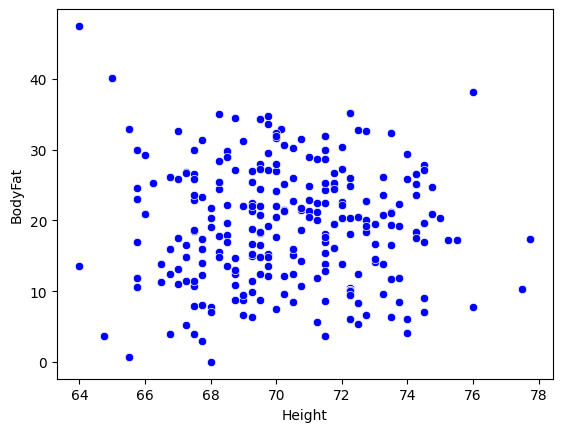

In [14]:
sns.scatterplot(x=data['Height'], y=data['BodyFat'], color='blue', markers='o')

As expected, there is no real relationship between height and bodyfat percentage.

But, what if we try to analyse the relationship between Height, Weight and its effect on bodyfat ?

<Axes: xlabel='Weight', ylabel='Height'>

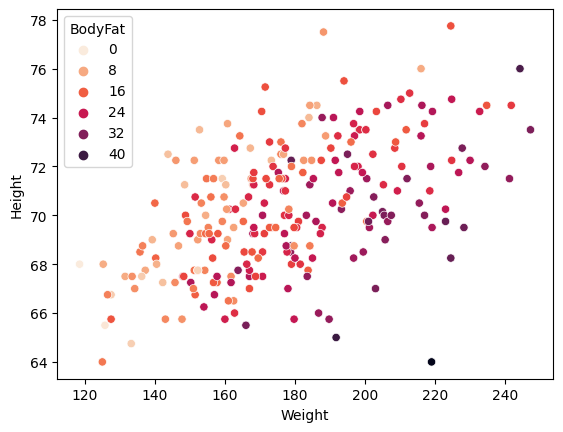

In [15]:
sns.scatterplot(x=data['Weight'], y=data['Height'], hue=data['BodyFat'], palette="rocket_r")

Althrough we can see some tendency for extreme values (small people that are really heavy, or big people that are really light), There are some height/weight ratios where it is hard to extract a tendency. It seems logical because there are people that are heavy but muscular, so their bodyfat is low.

We can conclude that height and weight is not enough. It also proves that BMI is not enough to know if someone is overweight or not. However it can be used as an indicator, and we could use it as an additional feature for our dataset.

#### 1.5 Neck

Let's draw a boxplot of the Neck Circumference to see if there is any outliers

<Axes: xlabel='Neck', ylabel='Density'>

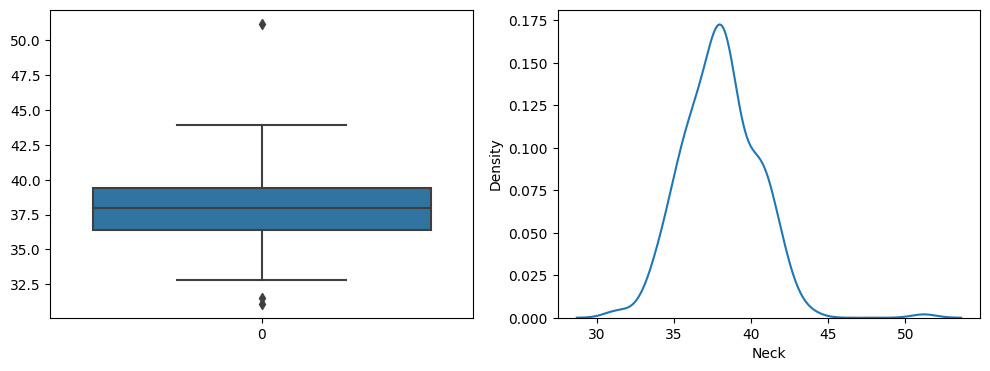

In [16]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Neck'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Neck"])

As we can see, there are outliers. What we can do is replace values over 50 and under 32 by the mean of neck circumference, so we reduce the number of outliers, and our distribution becomes normal.

In [17]:
data['Neck'] = np.where(data['Neck'] > 50, data["Neck"].mean() , data["Neck"])
data['Neck'] = np.where(data['Neck'] < 30, data["Neck"].mean() , data["Neck"])

<Axes: xlabel='Neck', ylabel='Density'>

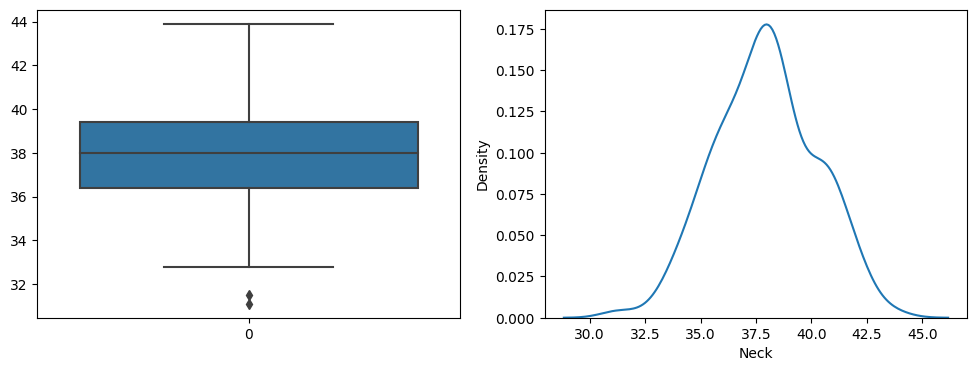

In [18]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Neck'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Neck"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between Neck circumference and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Neck', ylabel='BodyFat'>

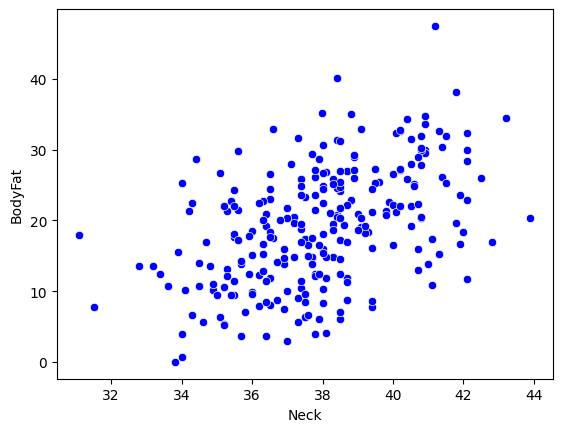

In [19]:
sns.scatterplot(x=data['Neck'], y=data['BodyFat'], color='blue', markers='o')

Even though the data is sparse, we could draw a tendancy between neck circumference and bodyfat. As the neck isn't the first place where our body is storing fat, it seems normal that the data is sparse.

#### 1.6 Chest

Let's draw a boxplot of the Chest circumference to see if there is any outliers

<Axes: xlabel='Chest', ylabel='Density'>

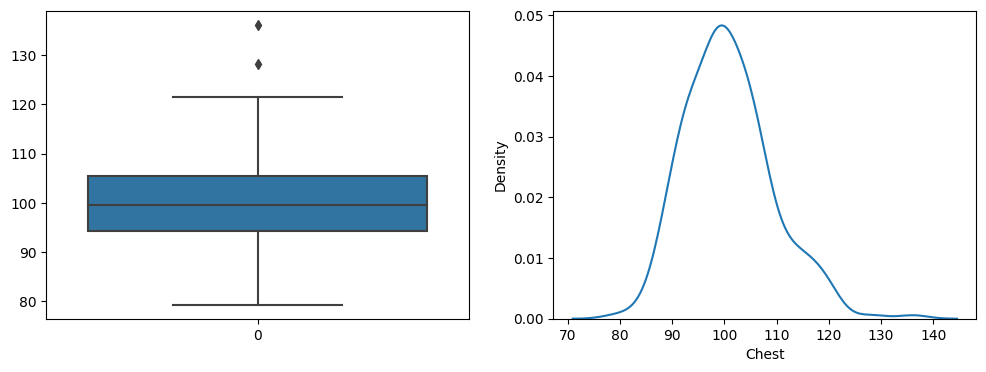

In [20]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Chest'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Chest"])

As we can see, there are outliers. What we can do is replace values over 125 by the mean of chest circumference, so we reduce the number of outliers, and our distribution becomes normal.

In [24]:
data['Chest'] = np.where(data['Chest'] > 125, data["Chest"].mean() , data["Chest"])

<Axes: xlabel='Chest', ylabel='Density'>

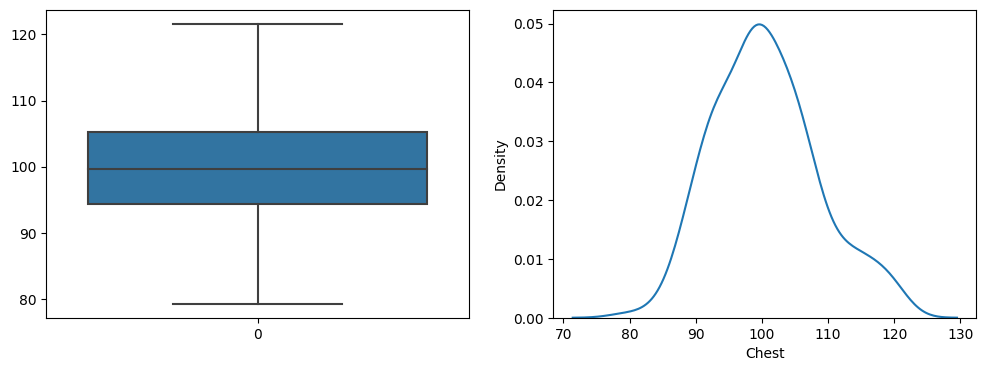

In [22]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Chest'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Chest"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between chest circumference and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Chest', ylabel='BodyFat'>

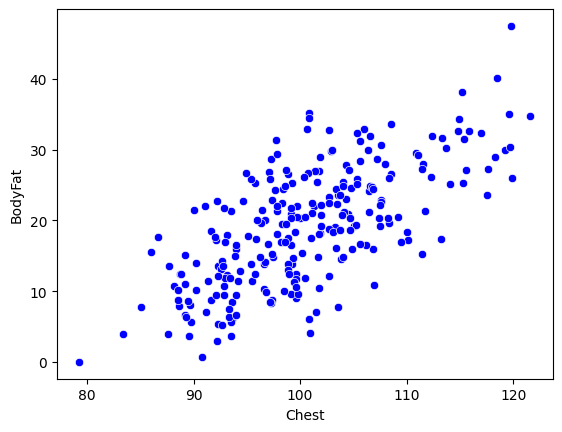

In [23]:
sns.scatterplot(x=data['Chest'], y=data['BodyFat'], color='blue', markers='o')

Although the data is sparse, we could draw a tendancy between chest circumference and bodyfat.

#### 1.7 Abdomen

Let's draw a boxplot of the Abdomen Circumference to see if there is any outliers

<Axes: xlabel='Abdomen', ylabel='Density'>

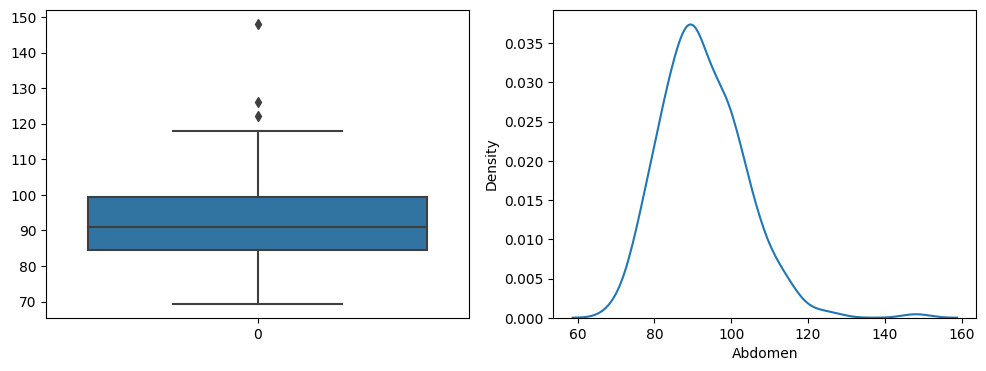

In [25]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Abdomen'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Abdomen"])

As we can see, there are outliers. What we can do is replace values over 120 by the mean of abdomen circumference, so we reduce the number of outliers, and our distribution becomes normal.

In [27]:
data['Abdomen'] = np.where(data['Abdomen'] > 120, data["Abdomen"].mean() , data["Abdomen"])

<Axes: xlabel='Abdomen', ylabel='Density'>

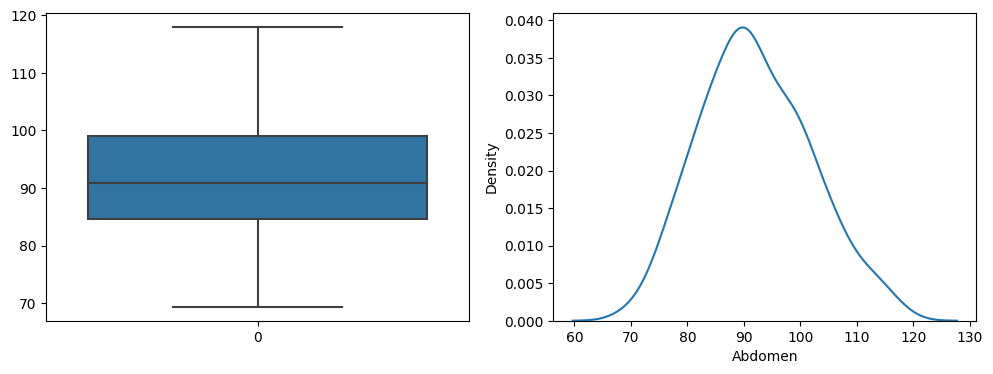

In [29]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Abdomen'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Abdomen"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between adbomen circumference and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Abdomen', ylabel='BodyFat'>

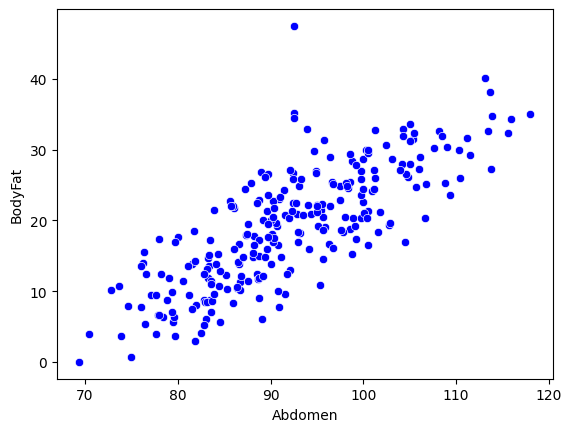

In [31]:
sns.scatterplot(x=data['Abdomen'], y=data['BodyFat'], color='blue', markers='o')

As Expected, there is a strong relationship between the abdomen circumference and the bodyfat percentage. In fact, usually, the first place where the body stores fat is the belly.

#### 1.8 Hip

Let's draw a boxplot of the Hip Circumference to see if there is any outliers

<Axes: xlabel='Hip', ylabel='Density'>

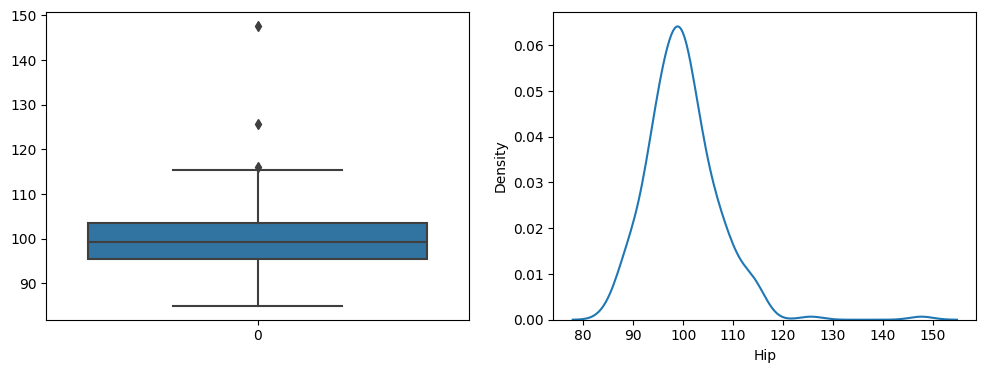

In [33]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Hip'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Hip"])

As we can see, there are outliers. What we can do is replace values over 115 by the mean of hip circumference, so we reduce the number of outliers, and our distribution becomes normal.

In [34]:
data['Hip'] = np.where(data['Hip'] > 115, data["Hip"].mean() , data["Hip"])

<Axes: xlabel='Hip', ylabel='Density'>

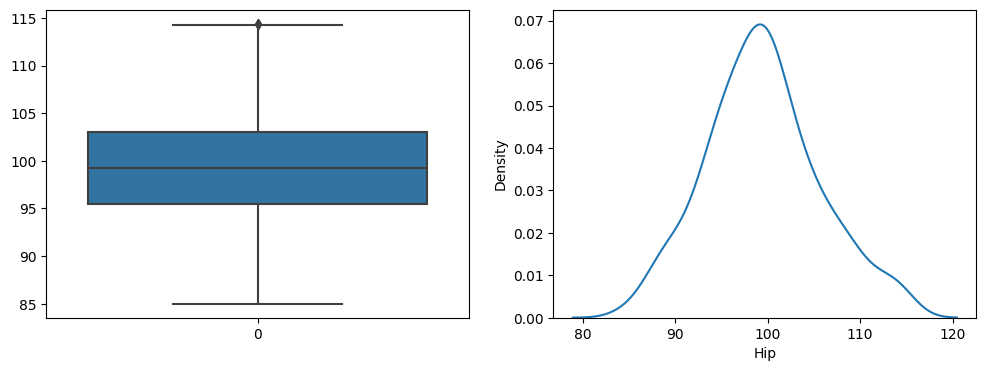

In [35]:
plt.close("all")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['Hip'])
plt.subplot(1, 2, 2)
sns.kdeplot(data["Hip"])

With this transformation, the data looks cleaner now, with no outliers and a normal distribution.

Now let's analyse the relationship between hip circumference and bodyfat percentage, to see if we can extract any tendency from it.

<Axes: xlabel='Hip', ylabel='BodyFat'>

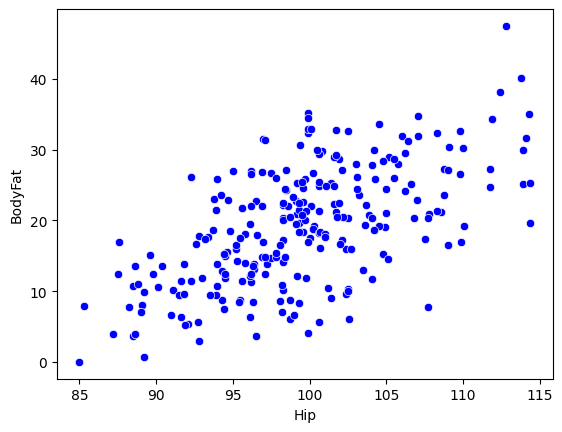

In [36]:
sns.scatterplot(x=data['Hip'], y=data['BodyFat'], color='blue', markers='o')

Although it is a bit more sparse than with the abdomen circumference, there is a strong relationship between the hip circumference and the bodyfat percentage.